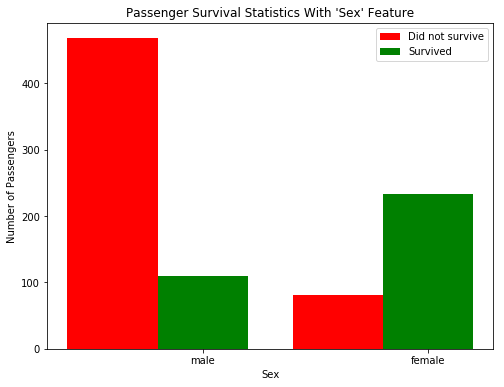

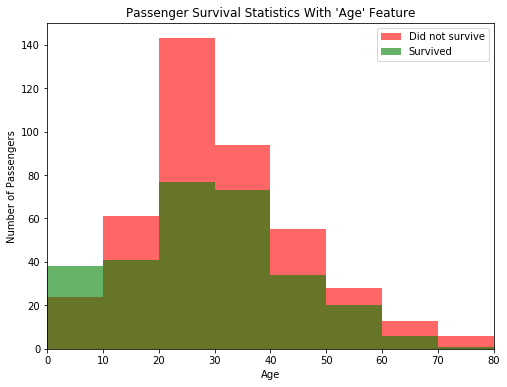

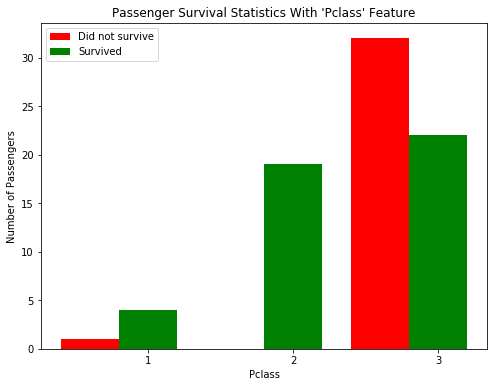

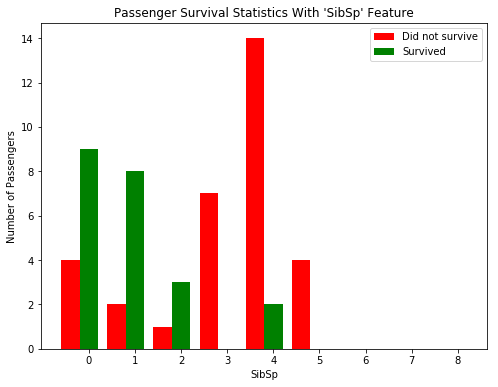

In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def filter_data(data, condition):
    """
    Remove elements that do not match the condition provided.
    Takes a data list as input and returns a filtered list.
    Conditions should be a list of strings of the following format:
      '<field> <op> <value>'
    where the following operations are valid: >, <, >=, <=, ==, !=
    
    Example: ["Sex == 'male'", 'Age < 18']
    """

    field, op, value = condition.split(" ")
    
    # convert value into number or strip excess quotes if string
    try:
        value = float(value)
    except:
        value = value.strip("\'\"")
    
    # get booleans for filtering
    if op == ">":
        matches = data[field] > value
    elif op == "<":
        matches = data[field] < value
    elif op == ">=":
        matches = data[field] >= value
    elif op == "<=":
        matches = data[field] <= value
    elif op == "==":
        matches = data[field] == value
    elif op == "!=":
        matches = data[field] != value
    else: # catch invalid operation codes
        raise Exception("Invalid comparison operator. Only >, <, >=, <=, ==, != allowed.")
    
    # filter data and outcomes
    data = data[matches].reset_index(drop = True)
    return data

def survival_stats(data, outcomes, key, filters = []):
    """
    Print out selected statistics regarding survival, given a feature of
    interest and any number of filters (including no filters)
    """
    
    # Check that the key exists
    if key not in data.columns.values :
        print "'{}' is not a feature of the Titanic data. Did you spell something wrong?".format(key)
        return False

    # Return the function before visualizing if 'Cabin' or 'Ticket'
    # is selected: too many unique categories to display
    if(key == 'Cabin' or key == 'PassengerId' or key == 'Ticket'):
        print "'{}' has too many unique categories to display! Try a different feature.".format(key)
        return False

    # Merge data and outcomes into single dataframe
    all_data = pd.concat([data, outcomes], axis = 1)
    
    # Apply filters to data
    for condition in filters:
        all_data = filter_data(all_data, condition)

    # Create outcomes DataFrame
    all_data = all_data[[key, 'Survived']]
    
    # Create plotting figure
    plt.figure(figsize=(8,6))

    # 'Numerical' features
    if(key == 'Age' or key == 'Fare'):
        
        # Remove NaN values from Age data
        all_data = all_data[~np.isnan(all_data[key])]
        
        # Divide the range of data into bins and count survival rates
        min_value = all_data[key].min()
        max_value = all_data[key].max()
        value_range = max_value - min_value

        # 'Fares' has larger range of values than 'Age' so create more bins
        if(key == 'Fare'):
            bins = np.arange(0, all_data['Fare'].max() + 20, 20)
        if(key == 'Age'):
            bins = np.arange(0, all_data['Age'].max() + 10, 10)
        
        # Overlay each bin's survival rates
        nonsurv_vals = all_data[all_data['Survived'] == 0][key].reset_index(drop = True)
        surv_vals = all_data[all_data['Survived'] == 1][key].reset_index(drop = True)
        plt.hist(nonsurv_vals, bins = bins, alpha = 0.6,
                 color = 'red', label = 'Did not survive')
        plt.hist(surv_vals, bins = bins, alpha = 0.6,
                 color = 'green', label = 'Survived')
    
        # Add legend to plot
        plt.xlim(0, bins.max())
        plt.legend(framealpha = 0.8)
    
    # 'Categorical' features
    else:
       
        # Set the various categories
        if(key == 'Pclass'):
            values = np.arange(1,4)
        if(key == 'Parch' or key == 'SibSp'):
            values = np.arange(0,np.max(data[key]) + 1)
        if(key == 'Embarked'):
            values = ['C', 'Q', 'S']
        if(key == 'Sex'):
            values = ['male', 'female']

        # Create DataFrame containing categories and count of each
        frame = pd.DataFrame(index = np.arange(len(values)), columns=(key,'Survived','NSurvived'))
        for i, value in enumerate(values):
            frame.loc[i] = [value, \
                   len(all_data[(all_data['Survived'] == 1) & (all_data[key] == value)]), \
                   len(all_data[(all_data['Survived'] == 0) & (all_data[key] == value)])]

        # Set the width of each bar
        bar_width = 0.4

        # Display each category's survival rates
        for i in np.arange(len(frame)):
            nonsurv_bar = plt.bar(i-bar_width, frame.loc[i]['NSurvived'], width = bar_width, color = 'r')
            surv_bar = plt.bar(i, frame.loc[i]['Survived'], width = bar_width, color = 'g')

            plt.xticks(np.arange(len(frame)), values)
            plt.legend((nonsurv_bar[0], surv_bar[0]),('Did not survive', 'Survived'), framealpha = 0.8)

    # Common attributes for plot formatting
    plt.xlabel(key)
    plt.ylabel('Number of Passengers')
    plt.title('Passenger Survival Statistics With \'%s\' Feature'%(key))
    plt.show()

    # Report number of passengers with missing values
    if sum(pd.isnull(all_data[key])):
        nan_outcomes = all_data[pd.isnull(all_data[key])]['Survived']
        print "Passengers with missing '{}' values: {} ({} survived, {} did not survive)".format( \
              key, len(nan_outcomes), sum(nan_outcomes == 1), sum(nan_outcomes == 0))
# 加载数据集
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)
# 从数据集中移除 'Survived' 这个特征，并将它存储在一个新的变量中。
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)
#survival_stats(data, outcomes, 'Age', ["Sex == 'female'", "Age < 20"])
#survival_stats(data, outcomes, 'Pclass')
#survival_stats(data, outcomes, 'Parch')
#survival_stats(data, outcomes, 'SibSp')
#survival_stats(data, outcomes, 'Age')
#survival_stats(data, outcomes, 'Fare')
survival_stats(data, outcomes, 'Sex')
survival_stats(data, outcomes, 'Age')##
survival_stats(data, outcomes, 'Pclass',["Age < 15"])
survival_stats(data, outcomes, 'SibSp',["Age < 15","Pclass == 3"])

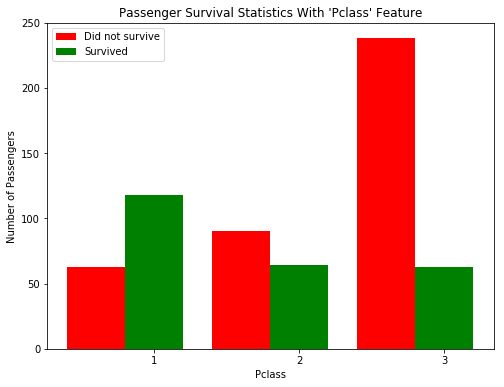

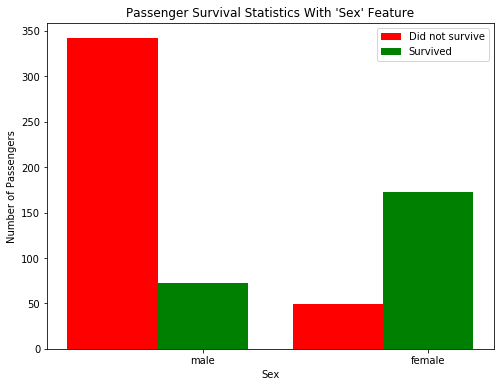

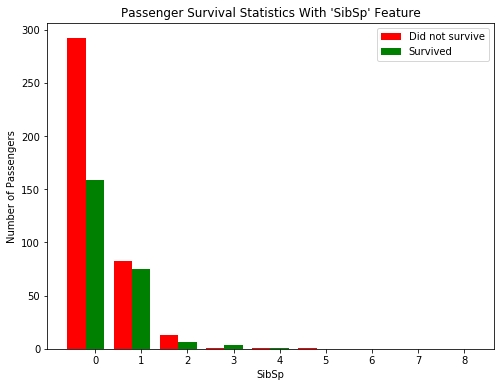

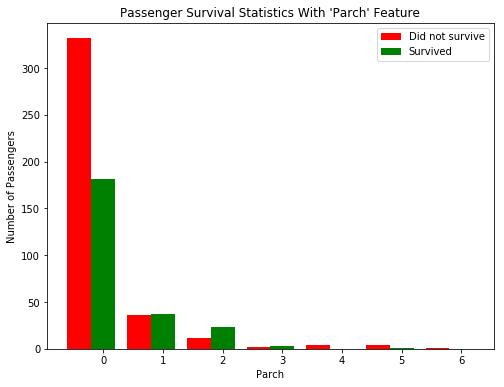

In [48]:
survival_stats(data, outcomes, 'Pclass',["Age >= 15"])
survival_stats(data, outcomes, 'Sex',["Age >= 15"])  ##Sex的区分度较好
survival_stats(data, outcomes, 'SibSp',["Age >= 15"])
survival_stats(data, outcomes, 'Parch',["Age >= 15"])

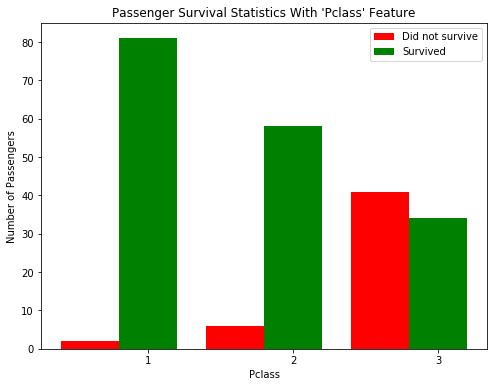

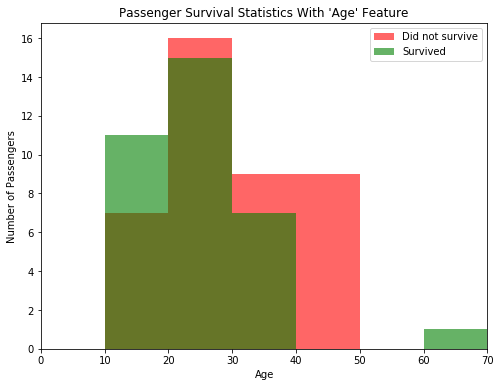

In [49]:
survival_stats(data, outcomes, 'Pclass',["Age >= 15","Sex == 'female'"])##Pclass=3的乘客需要进一步判断
survival_stats(data, outcomes, 'Age',["Age >= 15","Sex == 'female'","Pclass == 3"])

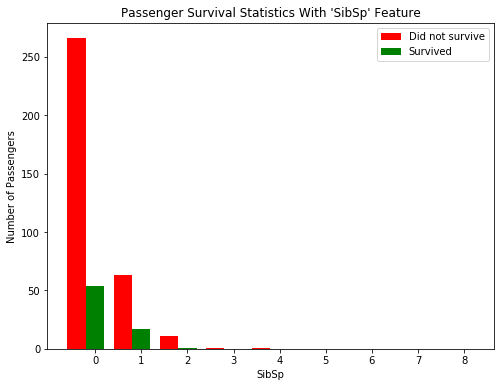

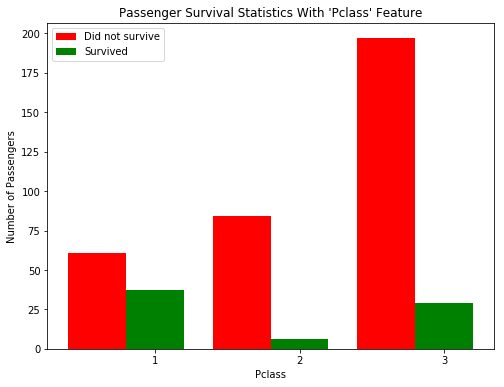

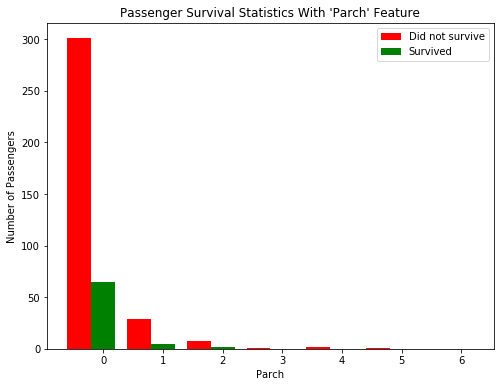

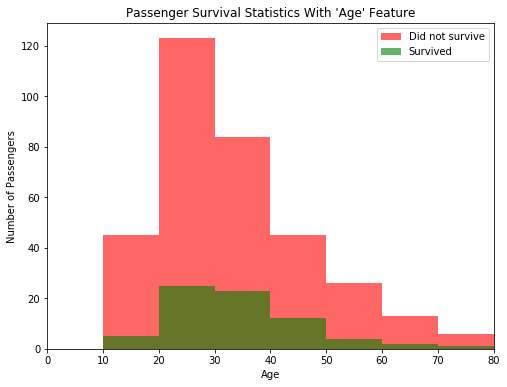

In [50]:
survival_stats(data, outcomes, 'SibSp',["Age >= 15","Sex == 'male'"])
survival_stats(data, outcomes, 'Pclass',["Age >= 15","Sex == 'male'"])##Pclass的区分性较好
survival_stats(data, outcomes, 'Parch',["Age >= 15","Sex == 'male'"])
survival_stats(data, outcomes, 'Age',["Age >= 15","Sex == 'male'"])

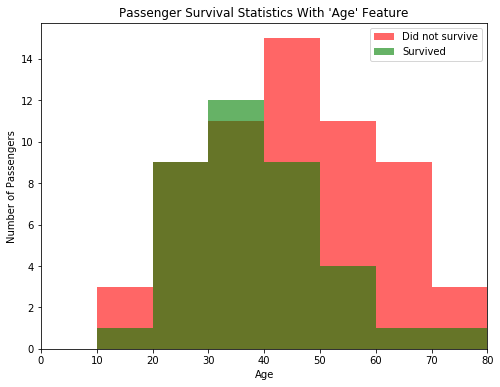

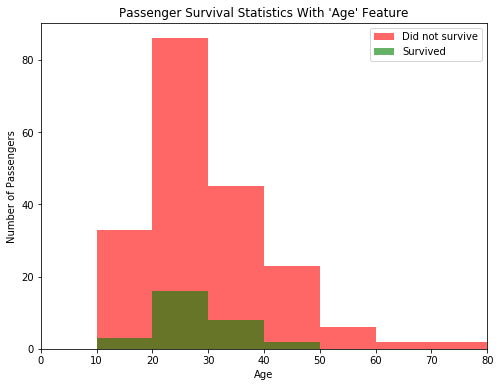

In [51]:
survival_stats(data, outcomes, 'Age',["Age >= 15","Sex == 'male'","Pclass == 1"])##调整参数，进一步按Age=37细分
survival_stats(data, outcomes, 'Age',["Age >= 15","Sex == 'male'","Pclass == 3"])